In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv("Airline_Delay_Cause.csv")
df.columns = df.columns.str.strip()
df.head(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,12,MQ,Envoy Air,EVV,"Evansville, IN: Evansville Regional",61.0,9.0,1.52,1.08,...,0.0,5.84,0.0,0.0,732.0,47.0,90.0,19.0,0.0,576.0
1,2024,12,MQ,Envoy Air,EWR,"Newark, NJ: Newark Liberty International",107.0,42.0,6.01,5.89,...,0.0,4.94,0.0,0.0,2531.0,335.0,491.0,1251.0,0.0,454.0
2,2024,12,MQ,Envoy Air,EYW,"Key West, FL: Key West International",169.0,31.0,3.37,0.71,...,0.0,15.48,5.0,3.0,1596.0,143.0,52.0,468.0,0.0,933.0
3,2024,12,MQ,Envoy Air,FAR,"Fargo, ND: Hector International",171.0,35.0,4.64,2.12,...,0.0,12.92,2.0,0.0,2428.0,245.0,184.0,575.0,0.0,1424.0
4,2024,12,MQ,Envoy Air,FSD,"Sioux Falls, SD: Joe Foss Field",69.0,14.0,2.00,2.47,...,0.0,4.83,1.0,0.0,720.0,86.0,154.0,191.0,0.0,289.0


Obj 1)Correlation Analysis Between Delay Causes

In [55]:
delay_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df_delay = df[delay_cols]

In [56]:
corr_matrix = df_delay.corr()

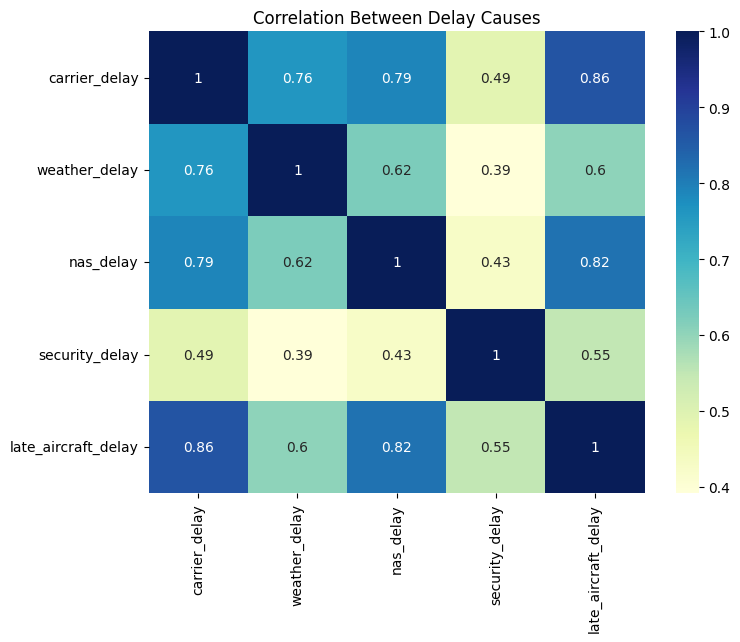

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Between Delay Causes")
plt.show()

Obj 2) Total Flights vs Delayed Flights

In [75]:
df[['carrier_name', 'arr_flights', 'arr_del15']].head()

,carrier_name,arr_flights,arr_del15
0,Envoy Air,61.0,9.0
1,Envoy Air,107.0,42.0
2,Envoy Air,169.0,31.0
3,Envoy Air,171.0,35.0
4,Envoy Air,69.0,14.0


In [76]:
grouped = df.groupby('carrier_name')[['arr_flights', 'arr_del15']].sum()

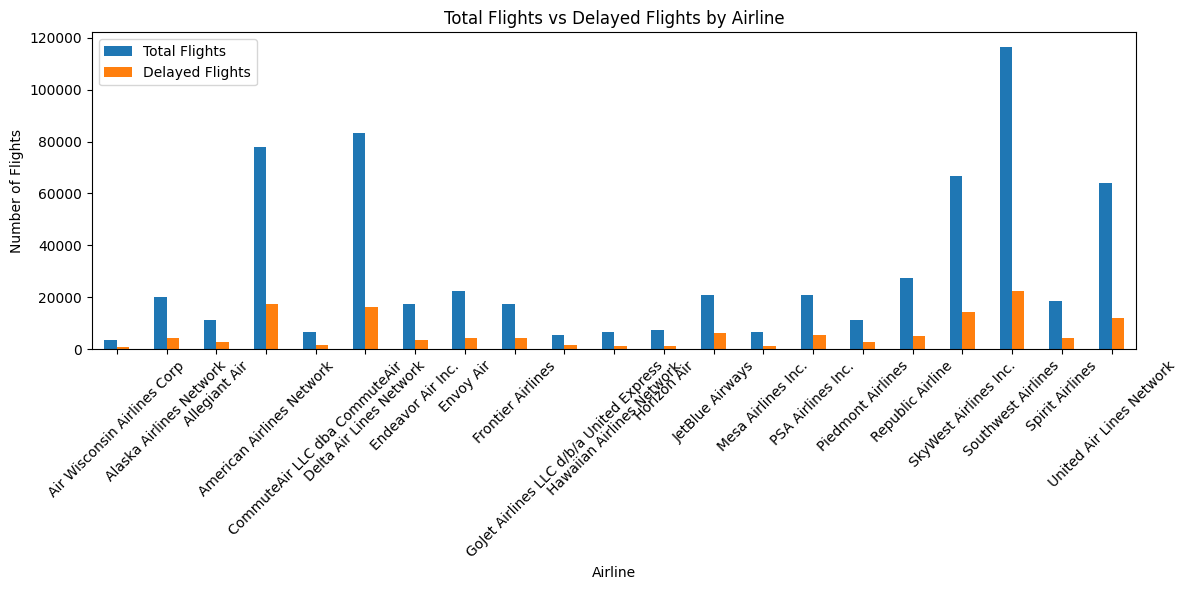

In [77]:
grouped.plot(kind='bar', figsize=(12,6))
plt.title('Total Flights vs Delayed Flights by Airline')
plt.ylabel('Number of Flights')
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.legend(['Total Flights', 'Delayed Flights'])
plt.tight_layout()
plt.show()


Obj 3) Delay Cause Contribution Ratio

In [78]:
delay_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df['TotalDelay'] = df[delay_cols].sum(axis=1)

In [79]:
for col in delay_cols:
    df[col + "_ratio"] = df[col] / df["TotalDelay"]

In [80]:
ratio_cols = [col + "_ratio" for col in delay_cols]
contribution = df.groupby('carrier_name')[ratio_cols].mean()

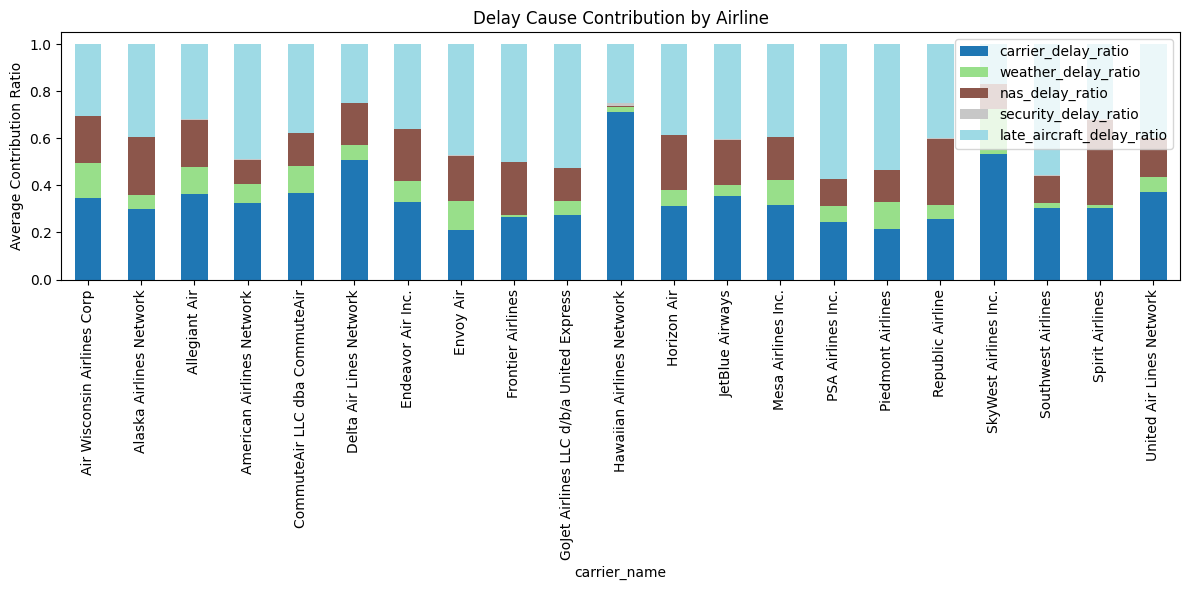

In [81]:
contribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Delay Cause Contribution by Airline")
plt.ylabel("Average Contribution Ratio")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Obj 4) Most and Least Reliable Airports

In [82]:
df['avg_delay'] = df['arr_delay'] / df['arr_flights']

In [83]:
airport_avg = df.groupby('airport_name')['avg_delay'].mean().sort_values()

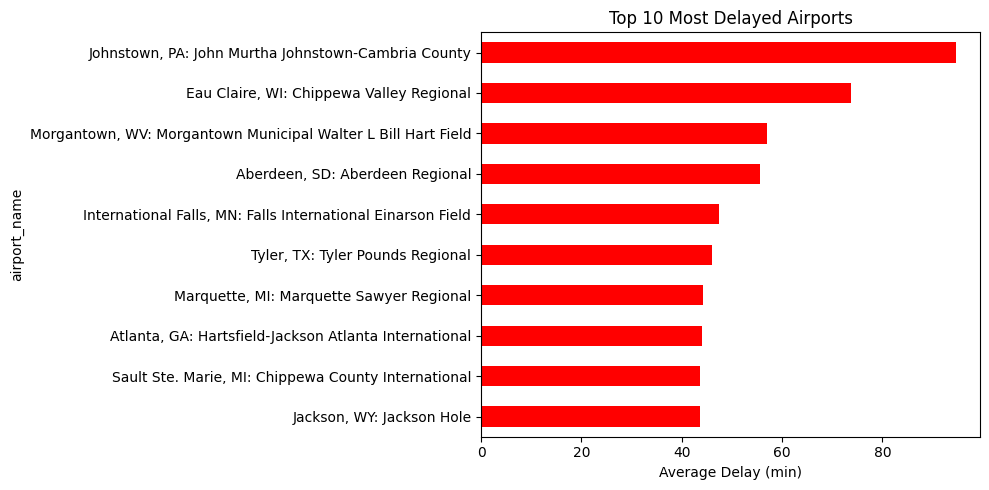

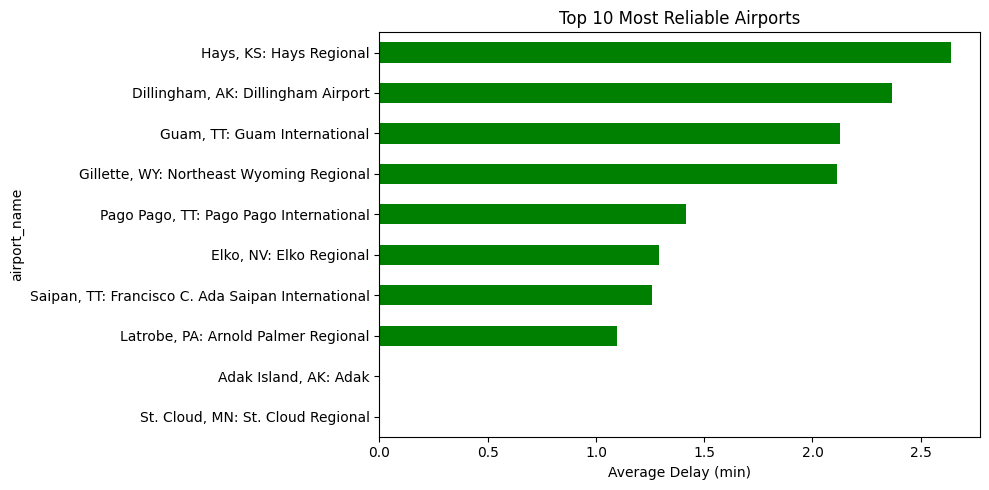

In [84]:
plt.figure(figsize=(10, 5))
airport_avg.tail(10).plot(kind='barh', color='red')  # Worst
plt.title("Top 10 Most Delayed Airports")
plt.xlabel("Average Delay (min)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
airport_avg.head(10).plot(kind='barh', color='green')  # Best
plt.title("Top 10 Most Reliable Airports")
plt.xlabel("Average Delay (min)")
plt.tight_layout()
plt.show()

Obj 5) Average Delay per Airline

In [85]:
grouped = df.groupby('carrier_name')[['arr_delay', 'arr_flights']].sum()
grouped['avg_delay'] = grouped['arr_delay'] / grouped['arr_flights']

In [86]:
grouped_sorted = grouped.sort_values('avg_delay', ascending=False)

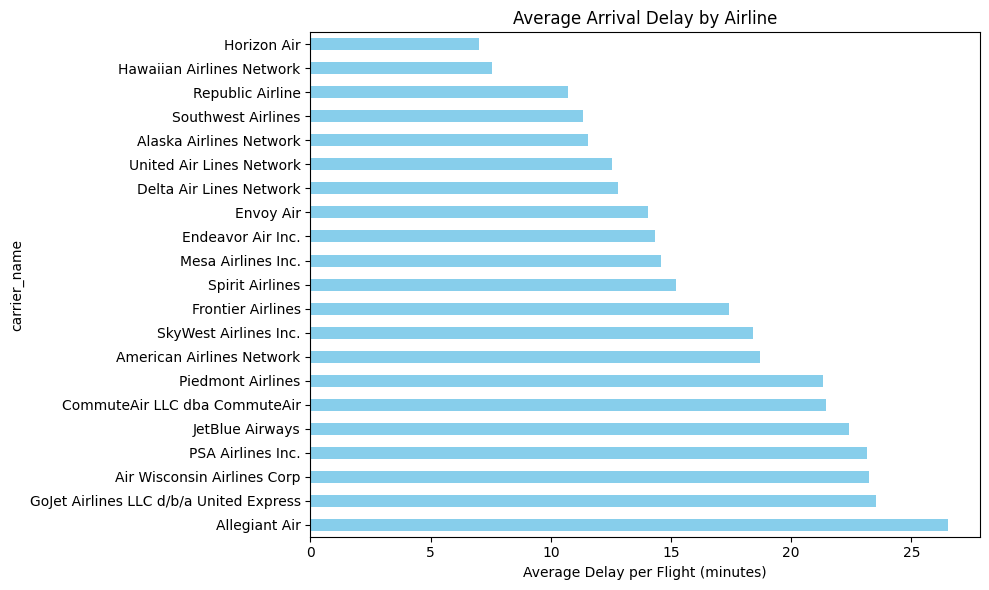

In [87]:
grouped_sorted['avg_delay'].plot(kind='barh', figsize=(10,6), color='skyblue')
plt.xlabel("Average Delay per Flight (minutes)")
plt.title("Average Arrival Delay by Airline")
plt.tight_layout()
plt.show()

Obj 6) Overall Delay Causes

In [88]:
delay_columns = ["carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]

In [89]:
delay_causes = df[delay_columns].sum()

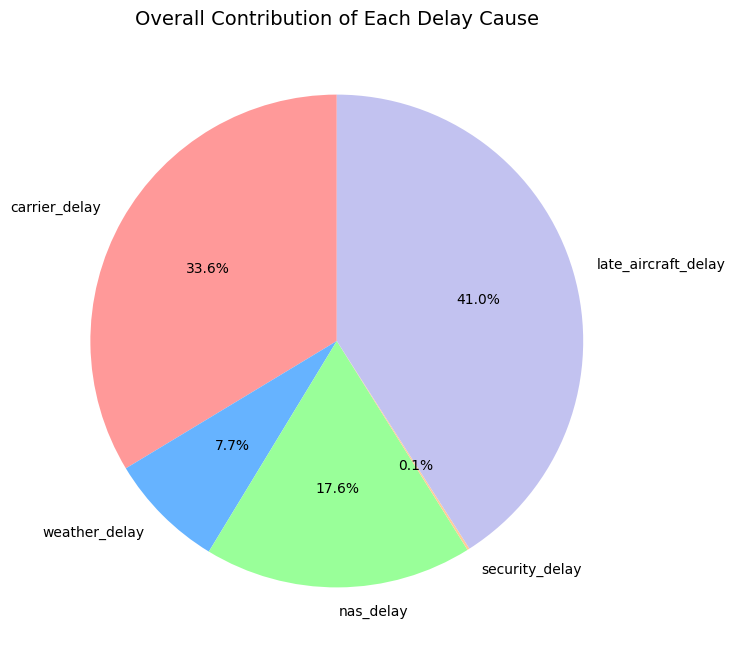

In [90]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

delay_causes.plot(kind='pie',
                  autopct='%1.1f%%',
                  startangle=90,
                  figsize=(8,8),
                  colors=colors,
                  ylabel='') 
plt.title("Overall Contribution of Each Delay Cause", fontsize=14)
plt.show()